## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. Click the blue "Edit Notebook" or "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first use `matplotlib` to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made. (Hey, I'm just a kerneling bot, not a Kaggle Competitions Grandmaster!)

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There is 1 csv file in the current version of the dataset:


In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sample_labels.csv
/kaggle/input/sample/sample_labels.csv
/kaggle/input/sample/images/00006199_010.png
/kaggle/input/sample/images/00003503_000.png
/kaggle/input/sample/images/00017423_004.png
/kaggle/input/sample/images/00022830_001.png
/kaggle/input/sample/images/00016794_000.png
/kaggle/input/sample/images/00010790_035.png
/kaggle/input/sample/images/00015606_039.png
/kaggle/input/sample/images/00005448_001.png
/kaggle/input/sample/images/00025094_000.png
/kaggle/input/sample/images/00001450_000.png
/kaggle/input/sample/images/00001043_004.png
/kaggle/input/sample/images/00001248_017.png
/kaggle/input/sample/images/00004067_000.png
/kaggle/input/sample/images/00014259_001.png
/kaggle/input/sample/images/00011121_000.png
/kaggle/input/sample/images/00016737_004.png
/kaggle/input/sample/images/00001373_009.png
/kaggle/input/sample/images/00022741_000.png
/kaggle/input/sample/images/00003534_036.png
/kaggle/input/sample/images/00019133_000.png
/kaggle/input/sample/images/0

The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [4]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [6]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [7]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/sample_labels.csv

In [8]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('/kaggle/input/sample_labels.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'sample_labels.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 11 columns


Let's take a quick look at what the data looks like:

In [9]:
df1.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


Distribution graphs (histogram/bar graph) of sampled columns:

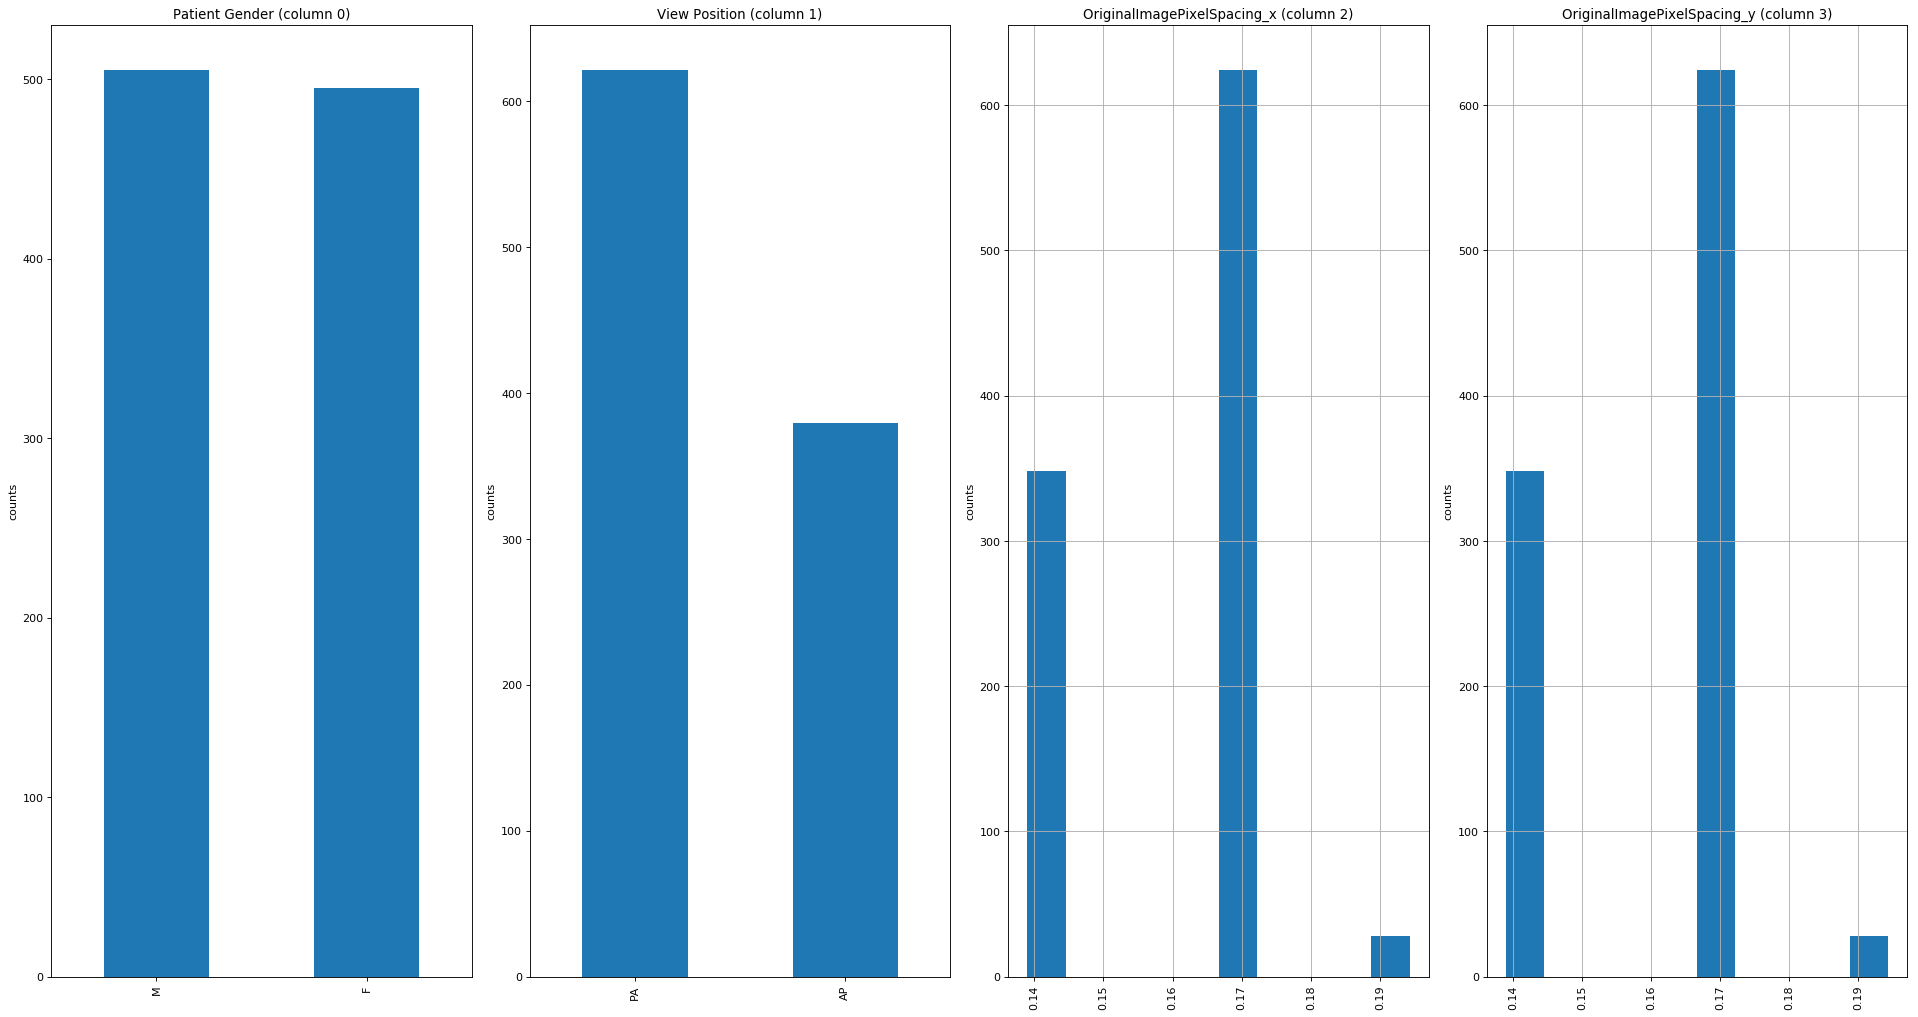

In [10]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

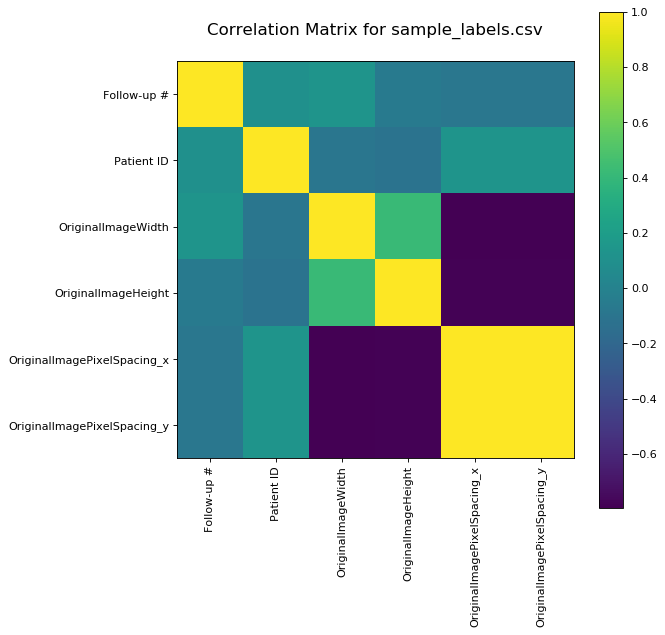

In [11]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

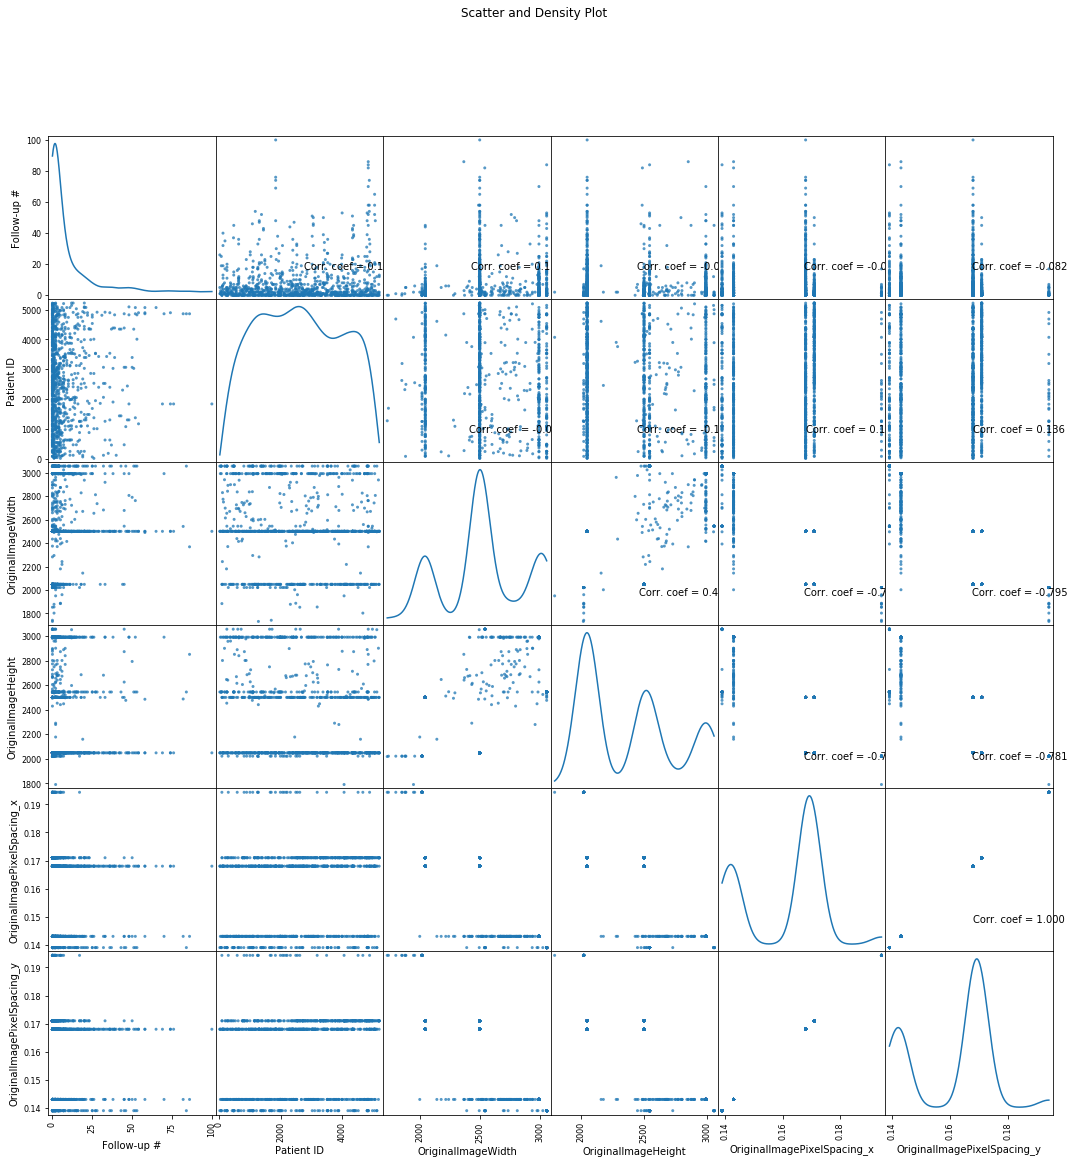

In [12]:
plotScatterMatrix(df1, 18, 10)

In [14]:
# Build model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(14, activation='sigmoid')  # Sigmoid for multi-label
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import os
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Load dataset
data_path = "/kaggle/input/sample/sample_labels.csv"
df = pd.read_csv(data_path)
print("Column names:", df.columns.tolist())
print("First few rows:\n", df.head())

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Column names: ['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID', 'Patient Age', 'Patient Gender', 'View Position', 'OriginalImageWidth', 'OriginalImageHeight', 'OriginalImagePixelSpacing_x', 'OriginalImagePixelSpacing_y']
First few rows:
         Image Index                                     Finding Labels  \
0  00000013_005.png  Emphysema|Infiltration|Pleural_Thickening|Pneu...   
1  00000013_026.png                             Cardiomegaly|Emphysema   
2  00000017_001.png                                         No Finding   
3  00000030_001.png                                        Atelectasis   
4  00000032_001.png                        Cardiomegaly|Edema|Effusion   

   Follow-up #  Patient ID Patient Age Patient Gender View Position  \
0            5          13        060Y              M            AP   
1           26          13        057Y              M            AP   
2            1          17        077Y              M            AP   
3            1      

/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [15]:
# Preprocess labels
label_column = 'Finding Labels'
if label_column not in df.columns:
    raise KeyError(f"Column '{label_column}' not found. Available columns: {df.columns.tolist()}")

# Get unique labels (excluding 'No Finding')
all_labels = sorted(set(label for sublist in df[label_column].str.split('|') for label in sublist if label != 'No Finding'))
print("Labels:", all_labels)

# Create binary columns for each label
for label in all_labels:
    df[label] = df[label_column].apply(lambda x: 1 if label in x.split('|') else 0)

# Prepare image paths
image_dir = "/kaggle/input/sample/images"  # Corrected path
df['Image Path'] = df['Image Index'].apply(lambda x: os.path.join(image_dir, x))

# Debug: Check image directory and files
print(f"Image directory: {image_dir}")
if os.path.exists(image_dir):
    print(f"Sample files: {os.listdir(image_dir)[:5]}")
else:
    raise FileNotFoundError(f"Image directory {image_dir} does not exist.")

# Check valid image paths
valid_paths = df['Image Path'].apply(os.path.exists)
print(f"Total images: {len(df)}, Valid paths: {sum(valid_paths)}")
if sum(valid_paths) == 0:
    raise FileNotFoundError(f"No valid images in {image_dir}. Check file names.")

# Filter valid paths
df = df[valid_paths]
print(f"Valid images after filtering: {len(df)}")

# Split data
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

# Data generator
def create_data_generator(df, batch_size=32):
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True
    )
    generator = datagen.flow_from_dataframe(
        dataframe=df,
        x_col='Image Path',
        y_col=all_labels,
        target_size=(224, 224),
        color_mode='grayscale',
        class_mode='raw',
        batch_size=batch_size,
        shuffle=True
    )
    return generator

train_generator = create_data_generator(train_df)
val_generator = create_data_generator(val_df)
test_generator = create_data_generator(test_df)

Labels: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']
Image directory: /kaggle/input/sample/images
Sample files: ['00006199_010.png', '00003503_000.png', '00017423_004.png', '00022830_001.png', '00016794_000.png']
Total images: 5606, Valid paths: 5606
Valid images after filtering: 5606
Train: 3924, Val: 841, Test: 841
Found 3924 validated image filenames.
Found 841 validated image filenames.
Found 841 validated image filenames.


Epoch 1/10
123/123 [==============================] - 79s 641ms/step - loss: 0.2282 - acc: 0.9357 - val_loss: 0.1775 - val_acc: 0.9525
Epoch 2/10
123/123 [==============================] - 74s 604ms/step - loss: 0.1970 - acc: 0.9493 - val_loss: 0.1741 - val_acc: 0.9525
Epoch 3/10
123/123 [==============================] - 74s 603ms/step - loss: 0.1905 - acc: 0.9498 - val_loss: 0.1742 - val_acc: 0.9525
Epoch 4/10
123/123 [==============================] - 74s 602ms/step - loss: 0.1880 - acc: 0.9498 - val_loss: 0.1721 - val_acc: 0.9525
Epoch 5/10
123/123 [==============================] - 75s 612ms/step - loss: 0.1867 - acc: 0.9499 - val_loss: 0.1734 - val_acc: 0.9525
Epoch 6/10
123/123 [==============================] - 77s 624ms/step - loss: 0.1834 - acc: 0.9499 - val_loss: 0.1773 - val_acc: 0.9525
Epoch 7/10
123/123 [==============================] - 79s 643ms/step - loss: 0.1839 - acc: 0.9499 - val_loss: 0.1737 - val_acc: 0.9525


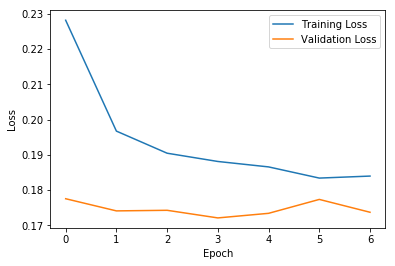

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stopping]
)

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
#code for model evaluation
from sklearn.metrics import classification_report

# Evaluate model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Get predictions
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred_binary = (y_pred > 0.5).astype(int)
y_true = test_df[all_labels].values

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_binary, target_names=all_labels))

27/27 [==============================] - 28s 1s/step - loss: 0.1862 - acc: 0.9473
Test Loss: 0.1862, Test Accuracy: 0.9473
Classification Report:
                    precision    recall  f1-score   support

       Atelectasis       0.00      0.00      0.00       100
      Cardiomegaly       0.00      0.00      0.00        21
     Consolidation       0.00      0.00      0.00        36
             Edema       0.00      0.00      0.00        14
          Effusion       0.00      0.00      0.00       107
         Emphysema       0.00      0.00      0.00        18
          Fibrosis       0.00      0.00      0.00        10
            Hernia       0.00      0.00      0.00         0
      Infiltration       0.00      0.00      0.00       144
              Mass       0.00      0.00      0.00        52
            Nodule       0.00      0.00      0.00        47
Pleural_Thickening       0.00      0.00      0.00        21
         Pneumonia       0.00      0.00      0.00        12
      Pneumot

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/s

In [27]:
from IPython.display import FileLink

# Replace 'your_model.h5' with your actual filename
FileLink('chest_xray_weights.h5')


/kaggle/working/chest_xray_weights.h5

In [26]:
# Replace 'model' with your actual model variable name if different
model.save('chest_xray_weights.h5')  # Saves the full model (architecture + weights)


In [22]:
model.save_weights('chest_xray_weights.h5')


In [23]:
cd /kaggle/working/

/kaggle/working


In [24]:
ls

chest_xray_model.h5  chest_xray_weights.h5
